In [256]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns; sns.set() 
from matplotlib import pyplot
%matplotlib inline

# 1. Data pre-processing - Understand the data and treat missing values

In [258]:
vs_df = pd.read_csv("vehicle.csv")

In [259]:
vs_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [260]:
print("Data for Vehicle csv:",vs_df.shape)
vs_df.info()

Data for Vehicle csv: (846, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 no

In [261]:
vs_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [263]:
#Lets replace the missing values by median value.
#vs_df.fillna(0)
vs_df.replace('', np.nan, inplace=True)
numeric_cols = vs_df.drop('class', axis=1)
class_type  = vs_df.pop("class")
numeric_cols = numeric_cols.apply(lambda x: x.fillna(x.median()),axis=0)
new_vs_df = numeric_cols.join(class_type)

In [264]:
# Replaced all nan values with median of column.
new_vs_df.shape

(846, 19)

# 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

In [265]:
new_vs_df.groupby(["class"]).count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
class,,,,,,,,,,,,,,,,,,
bus,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218
car,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429
van,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199


In [ ]:
# We can see thre types of vehical(bus, car and van) and there respective row count. 

In [266]:
new_vs_df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.936170,7.811882,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.580378,2.588558,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018409B401D0>,
      dtype=object)

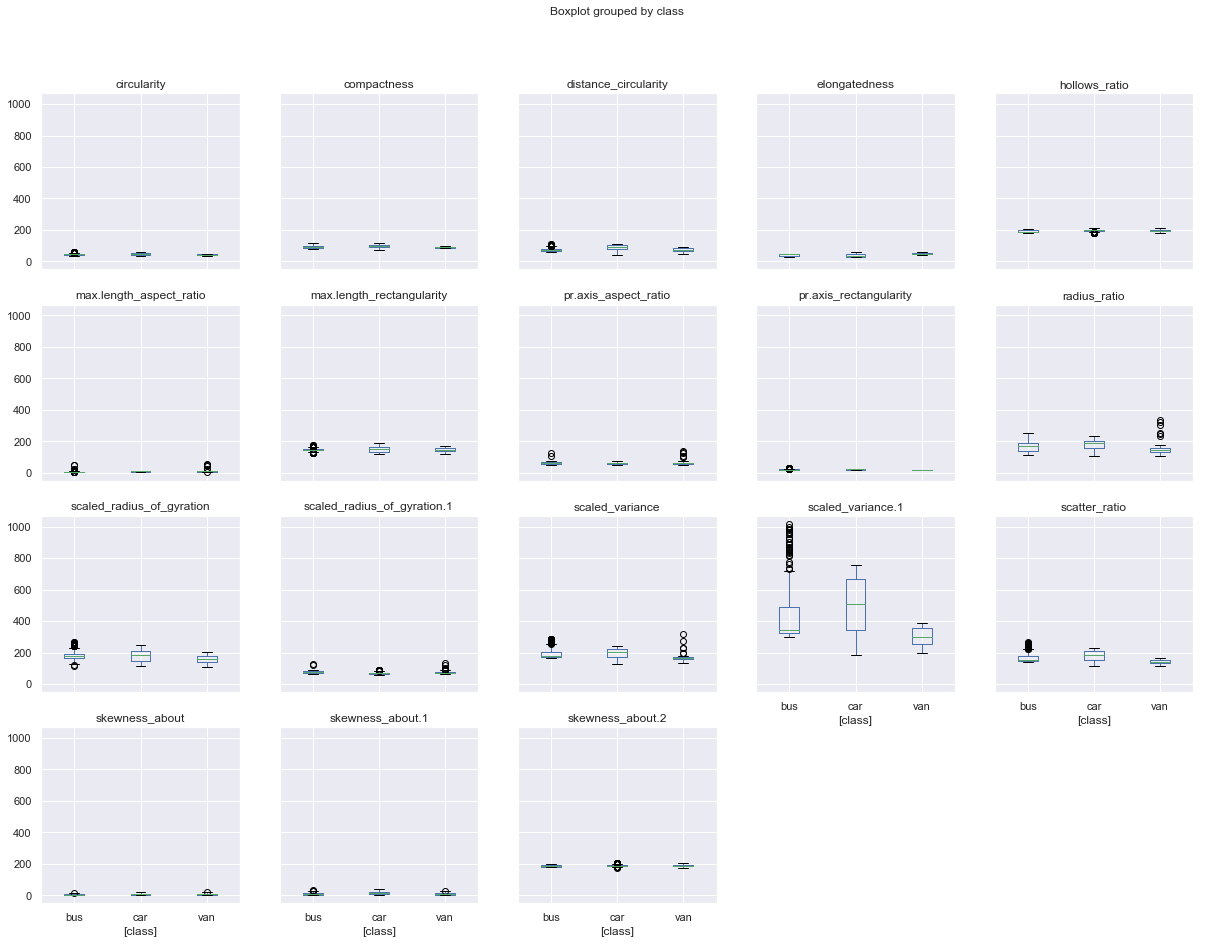

In [267]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.countplot(y='class', data=vs_df)
new_vs_df.boxplot(by = 'class',  layout=(4,5), figsize=(20, 15))

In [ ]:
# Many outliers in scatter_ratio, skewness_about, skewness_about.2 and class features.

In [268]:
# Ltes Remove these outliers form data.

numeric_cols = new_vs_df.drop('class', axis=1)
class_type  = new_vs_df.pop("class")
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
numeric_cols = numeric_cols[~((numeric_cols < (Q1 - 1.5*IQR)) | (numeric_cols > (Q3 + 1.5*IQR))).any(axis=1)]
new_vs_df = numeric_cols.join(class_type)
#new_vs_df.head().T
new_vs_df.shape

(813, 19)

In [270]:
#new_vs_df.boxplot(by = 'class',  layout=(4,5), figsize=(20, 15))

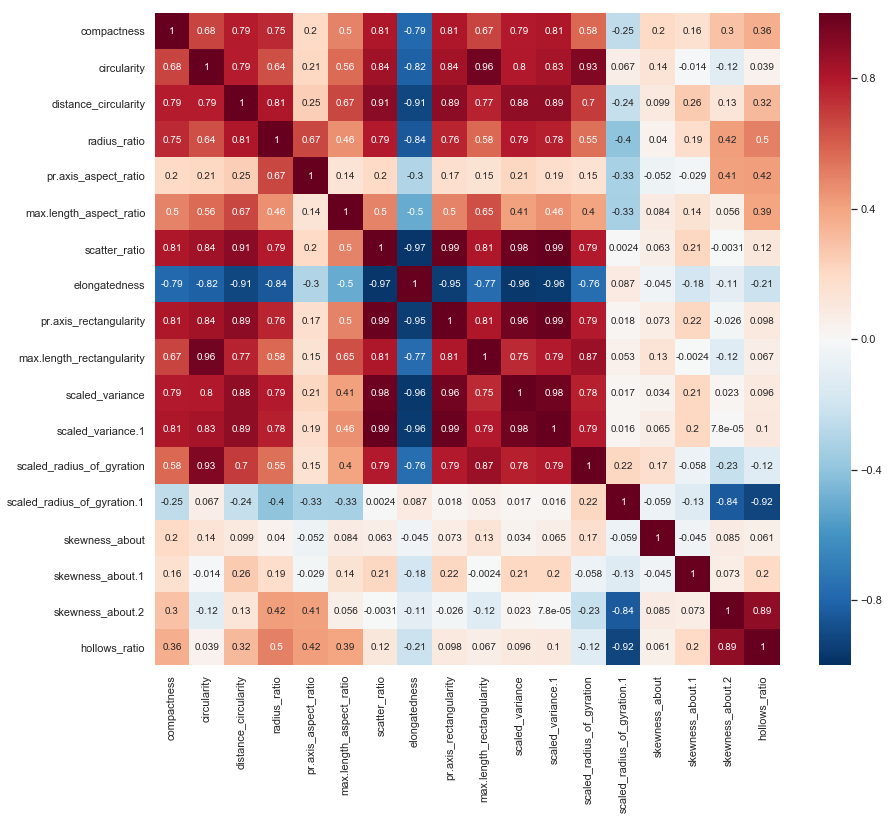

In [271]:
#new_vs_df.corr()
correlation = new_vs_df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [ ]:
# Circularity has highest correlation with max.length_rectangularity
# scatter_ratio has highest correlation with pr.axis_rectangularity, scaled_variance and scaled_variance.1
# So we can drop max.length_rectangularity, pr.axis_rectangularity, scaled_variance and scaled_variance.1 columns.

In [272]:
new_df = new_vs_df.drop(['max.length_rectangularity','pr.axis_rectangularity','scaled_variance','scaled_variance.1'], axis=1)

In [273]:
new_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,127.0,63.0,6.0,10.0,199.0,207,van
5,107,44.0,106.0,172.0,50.0,6,255.0,26.0,264.0,85.0,5.0,9.0,181.0,183,bus


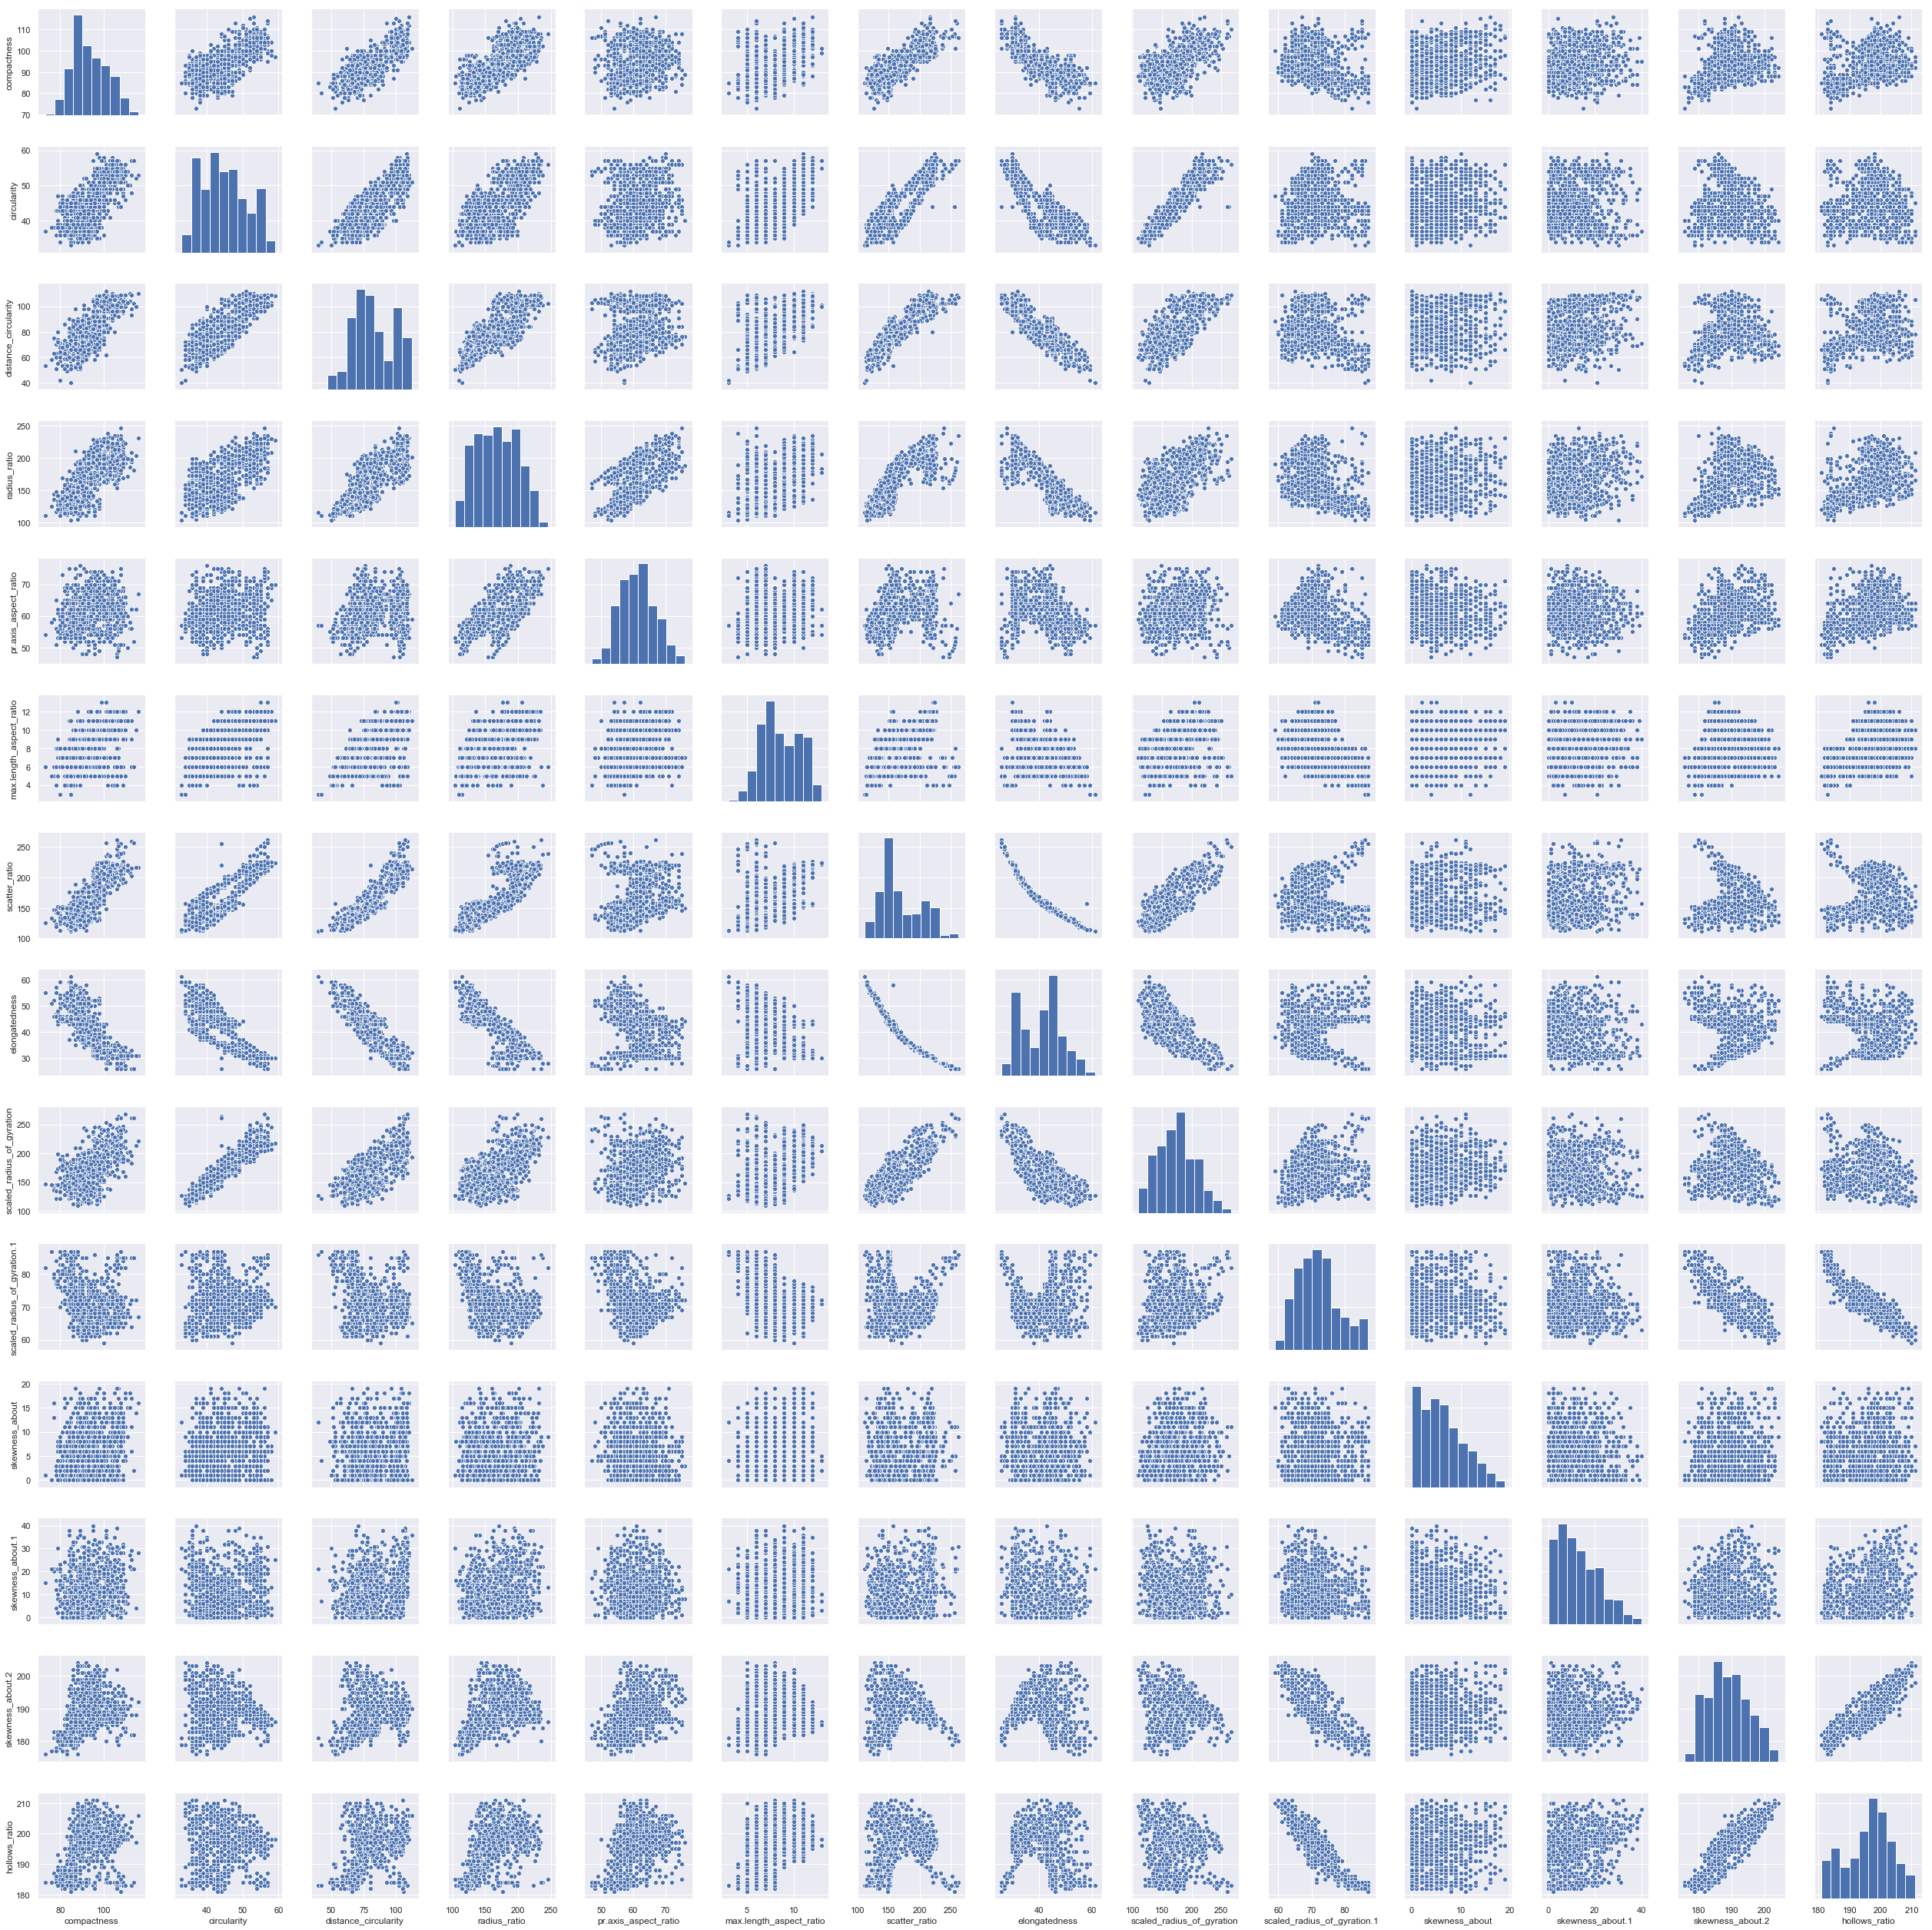

In [275]:
sns.pairplot(new_df)

In [276]:
# Data is skewed for the columns skewness_about and skewness_about.1
# Data is normally distibuted for compactness,pr.axis_aspect_ratio and max.length_aspect_ratio features.
# circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio are linearly related to compactness feature.

# 3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) 

In [278]:
# Standardize the data
from scipy.stats import zscore
numeric_cols = new_df.drop('class', axis=1)
class_type  = new_df.pop("class")
numeric_cols = numeric_cols.apply(zscore)
new_std_df = numeric_cols.join(class_type)
new_std_df.head().T

,0,1,2,3,5
compactness,0.172252,-0.324348,1.2896,-0.0760476,1.66205
circularity,0.524273,-0.621958,0.851768,-0.621958,-0.130716
distance_circularity,0.0544128,0.118805,1.53544,-0.00997964,1.53544
radius_ratio,0.320514,-0.852833,1.30359,-0.282015,0.130242
pr.axis_aspect_ratio,1.92374,-0.743688,0.856772,0.323285,-1.98849
max.length_aspect_ratio,0.917511,0.429013,0.917511,0.429013,-1.03648
scatter_ratio,-0.210249,-0.607056,1.16332,-0.759675,2.62845
elongatedness,0.143541,0.532106,-1.15168,0.661628,-1.92881
scaled_radius_of_gyration,0.297468,-0.505992,1.40995,-1.46396,2.76965
scaled_radius_of_gyration.1,-0.323897,-0.000794838,0.160756,-1.45475,2.09937


In [279]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X = new_std_df.drop('class', axis=1)
y = new_std_df.pop("class")
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [280]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(numeric_cols)
X_pca = pca.transform(X)
X_pca.shape

(813, 2)

In [281]:
# No. of columns reduced from 12 to 2 after aplying PCA method.

In [296]:
# Understanding Variance by Principal Components
pca = PCA().fit(X)

In [297]:
# cumulative sum of PCA's (PC1 + PC2 + PC3 + ... + PCn)
np.cumsum(pca.explained_variance_ratio_)

array([0.45970776, 0.68458164, 0.76641841, 0.84571606, 0.9029074 ,
       0.94572927, 0.9658019 , 0.97967267, 0.98706153, 0.99119005,
       0.99468551, 0.99715472, 0.99903891, 1.        ])

In [284]:
# from above values we can see upto 7 values 96.21% varience is covered.

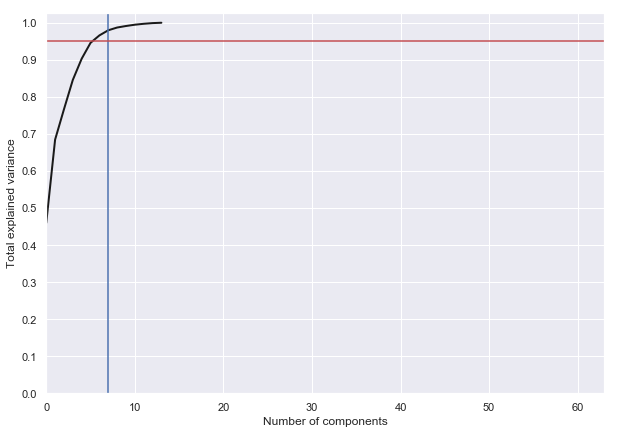

In [285]:
# Visualize Variance by new Dimensions
plt.figure(figsize=(10,7))

plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axvline(7, c='b')
plt.axhline(0.95, c='r')

plt.show()

# 4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy.

In [287]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC()
svc_model.fit(X_train, y_train)

C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [288]:
# Here, default values are: C=1.0 , kernel='rbf' , decision_function_shape='ovr' > means "one-verses-rest"

In [289]:
prediction = svc_model.predict(X_test)
#prediction
# check the accuracy on the training set
print("Train data accuracy is:", svc_model.score(X_train, y_train))
print("Test data accuracy is:", svc_model.score(X_test, y_test))

Train data accuracy is: 0.9771528998242531
Test data accuracy is: 0.9590163934426229


In [290]:
# With default set values we get SVM model accuracy as 95.90% on test data set.

In [291]:
#With Hyper Parameters Tuning
from sklearn.model_selection import GridSearchCV
from sklearn import svm

model=svm.SVC()
#Hyper Parameters Set
params = {'C': [0.01, 0.05, 0.5, 1], 
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters:
 {'C': 1, 'kernel': 'rbf'}
Accuracy: 0.9590163934426229
Confusion Matrix:
 [[ 62   1   1]
 [  0 118   4]
 [  1   3  54]]


C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [292]:
# We can get best accuracy of 95.90% with hyper parameter set as 'C'=1 and kernel set as 'rbf'

In [293]:
# Cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Mangesh Karande\Anaconda3\lib\site-packa

Cross-validation scores: [0.95121951 0.98780488 0.96341463 0.97560976 0.98780488 0.98780488
 0.95061728 0.96296296 0.95       0.97468354]
Average cross-validation score: 0.97


C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [298]:
# WIth cross validation we get the 97% accuracy.

In [299]:
#So with SVM model we can classify a given silhouette as one of three types of vehicle with 95.90% accurracy.